[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/400-Airline-Text-Analytics-Part-I.ipynb)

# Airline Text Analytics

### Strings

Text data always starts out in the form of a string. A **string** is a sequence (list) of **characters**. This includes the (English) alphanumeric characters and also special characters like white space, punctuation, etc. Other symbols, like emoticons, can also appear in your data, specially in social networks data. Besides that, you can also find letters from other languages (Spanish, Portuguese, etc) or alphabets (Cyrillic, hiragana, etc), and even ideographs (such as Han characters).

### Characters as numbers

There is a basic set of 127 characters, called the **ASCII characters**, which are encoded in the same way by all the computers, so you will never have trouble with them. They include the English letters (without accents), the numbers, basic punctuation (not curly quote marks or long dashes), white space, **control characters** such as the new line, represented in programming languages as `\n`, and other symbols familiar to you, such as the dollar ($) and the hash (#) symbols. The complete list can be easily found in Internet.

Non-ASCII characters can be encoded by different computers or different text editors in different ways. Mind that, if you capture string data on your own, you will probably find some of these characters in your data. Even when the documents are expected to be in English, they can be contaminated by other languages: Han
characters, German dieresis, Spanish eñe, etc. 

The preferred **encoding** is **UTF-8 (utf-8)**, which is the default encoding in Macintosh computers. Reading and writing text files in Pandas, the argument encoding allows you to manage both UTF-8 and the alternative encoding **Latin-1 (latin1)**. Windows computers use their own system, which is region specific. In US and Western Europe, this is **Windows-1252**, which is very close to Latin-1, though not exactly the same.

In [1]:
the_letter_A = chr(65)  # this
the_letter_A = 'A'      # is the same as this

the_letter_A 

'A'

In [2]:
for i in range(97,97+26):
    print(i, chr(i))

97 a
98 b
99 c
100 d
101 e
102 f
103 g
104 h
105 i
106 j
107 k
108 l
109 m
110 n
111 o
112 p
113 q
114 r
115 s
116 t
117 u
118 v
119 w
120 x
121 y
122 z


In [3]:
# This one is in Farsi, it may not render on your computer
print(chr(0x0604))

# This one is tradtional chinese
print(chr(0x9F8D))

؄
龍


### Strings as lists

Both lists and strings are **sequences**, so they share some core methods. A string can be regarded as a list of characters (letters, numbers, punctuation, etc). For instance, the function `len` gives you the number of characters of a string:

In [4]:
iese = 'IESE Business School'
iese

'IESE Business School'

In [5]:
print(len(iese))
print(iese[:4])

20
IESE


### Python string methods
Besides the methods shared with lists, Python has a collection of methods for manipulating strings:

* `lower()`: makes the string into all lowercase, this is useful when you're comparing strings and want to make the comparison case insensitive.
* `upper()`: same, but makes it uppercase
* `replace()`: replace a substring with something else, just like the usual "Find and Replace" method of text editors
* `split()`: splits a string into different segments (creates a list of segment strings). The split can be based on any separator. If no separator is specified, any whitespace string (containing only white space, line breaks or tabs) is a separator.
* `count()`: counts the number of occurrences of a pattern within a string:

In [6]:
name = 'Enric Junque de Fortuny'

print(name.upper(),name.lower())

ENRIC JUNQUE DE FORTUNY enric junque de fortuny


In [7]:
name.split(' ')

['Enric', 'Junque', 'de', 'Fortuny']

In [8]:
'---'.join(name.split(' '))

'Enric---Junque---de---Fortuny'

In [9]:
'---'.join(name.split()) # no args has a list of typical delimiters

'Enric---Junque---de---Fortuny'

# Airline Reviews

As part of an effort to better understand passenger satisfaction within the Star Alliance network, we analyze customer reviews from thousands of airline passengers both in and outside of network. The goal is to identify how factors like sentiment, seat type, travel purpose, and specific routes relate to overall recommendation rates.

The dataset includes 23,000+ reviews, with key variables such as:

- `Airline Name`: the name of the airline.
- `Route`: the flight route taken by the passenger.
- `Review`: free-text review written by the traveler.
- `Type Of Traveller`: e.g., Solo Leisure, Business, Couple.
- `Recommended`: whether the traveler recommends the airline (yes/no).
- `Seat Type`: seat class (e.g., Economy, Business).

Data Source: [Airlinequality.com](https://www.airlinequality.com/) via [Kaggle](https://www.kaggle.com/datasets/khushipitroda/airline-reviews/data)

### Importing the data

I've already partially cleaned it up for you (no duplicates), you can download it from [here](https://raw.githubusercontent.com/ciri/iese-dsfb/refs/heads/main/resources/text/Airline_Reviews.csv). Let us start by loading the CSV file that contains the data.

In [27]:
import pandas as pd

pd.set_option('display.max_colwidth', None) # This allow me to see the whole passage of a text review.

## Better: store it locally first, then open it
df = pd.read_csv('../resources/text/Airline_Reviews.csv')[['Airline Name','Route','Review','Type Of Traveller','Recommended','Seat Type']]
## Download every time, works but is slower:
# df = pd.read_csv('https://raw.githubusercontent.com/ciri/iese-dsfb/refs/heads/main/resources/text/Airline_Reviews.csv')[['Airline Name','Route','Review','Type Of Traveller','Recommended','Seat Type']]

df.head()

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type
0,AB Aviation,Moroni to Moheli,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",Solo Leisure,yes,Economy Class
1,AB Aviation,Moroni to Anjouan,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",Solo Leisure,no,Economy Class
2,AB Aviation,Anjouan to Dzaoudzi,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",Solo Leisure,no,Economy Class
3,Adria Airways,Frankfurt to Pristina,"Please do a favor yourself and do not fly with Adria. On the route from Munich to Pristina in July 2019 they lost my luggage and for 10 days in a row, despite numerous phone calls they were not able to locate it. 11 days later the luggage arrived at the destination completely ruined. Applying for compensation, they ignored my request. Foolishly again, I booked another flight with them (345 euros) Frankfurt - Pristina in September 2019. They cancelled the flight with no reason 24 hours before the departure. Desperate phone calls to customer service to get anything (rerouting, compensation, etc) were not responded. I will never fly again with Adria. What a disgrace! Shame on you Adria for constantly deceiving your customers.",Solo Leisure,no,Economy Class
4,Adria Airways,Sofia to Amsterdam via Ljubljana,"Do not book a flight with this airline! My friend and I should have returned from Sofia to Amsterdam on September 22 and 3 days before, they sent us an SMS informing the flight was cancelled. For 3 straight days we tried to reach the airline and the web agent (e-dreams) and we did not get a solution. Finally, 18 hours before our cancelled flight time, and after 35 minutes on a call (waiting), the airline was able to get us on a flight with Lufthansa. Do not book Adria Airways, it is unreliable and in our case, it ruined our last days of holidays since we needed to be on the phones all day.",Couple Leisure,no,Economy Class


### Exploring the dataset

There's not much to describe or calculate here at first sight as it's all text so `df.describe()` won't be that usefull. Let's introduce `.value_counts()` which is a quick way to count categories in one column, like a faster `.groupby('status').count()`.

In [11]:
df.groupby('Seat Type').count()

,Airline Name,Route,Review,Type Of Traveller,Recommended
Seat Type,,,,,
Business Class,2097,1806,2097,1808,2097
Economy Class,19129,16747,19129,16829,19129
First Class,186,168,186,168,186
Premium Economy,646,608,646,613,646


In [13]:
df['Seat Type'].value_counts()

Seat Type
Economy Class      19129
Business Class      2097
Premium Economy      646
First Class          186
Name: count, dtype: int64

**You try it**

1) Create a dummy for whether or not a passenger recommends a particular flight/airline. 
2) Then, show the _recommendation rate_ per type of traveler.

### Exploring the review text

When a Pandas column contains string, we can access its **string methods**. Pandas string methods are vectorized versions of the above methods. They return a series of the same length, in which each term results from applying a string function to the corresponding term of `s`. The syntax of these functions is typically `s.str.fname(args)`, where `s` is a Pandas series of strings (or a list of strings) and args is a set of ad hoc arguments.

In [14]:
f_has_space = df.Review.str.lower().str.contains("space")

df[f_has_space].head(10)

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type
41,Adria Airways,Manchester to Ljubljana,Excellent flights both ways with Adria Airways...,Family Leisure,yes,Economy Class
100,Aegean Airlines,Athens to Chania,We took 3 flights with Aegean and would not r...,Couple Leisure,no,Economy Class
111,Aegean Airlines,Mytilini to Athens,Check-in uneventful. Boarding a zoo with a r...,Business,no,Economy Class
126,Aegean Airlines,Athens to Brussels,"Good things: usually rather new planes, dep...",Family Leisure,no,Economy Class
129,Aegean Airlines,Athens to Zurich,The first flight from Zurich to Athens was p...,Family Leisure,no,Economy Class
169,Aegean Airlines,Athens to Istanbul,The space for legs cannot be considered acce...,Business,no,Business Class
185,Aegean Airlines,Stuttgart to Heraklion,Nothing to complain about. Stuttgart to Hera...,Couple Leisure,yes,Economy Class
190,Aegean Airlines,Sofia to Thessaloniki via Athens,Zero arrangements for connection flights. My...,Solo Leisure,no,Economy Class
206,Aer Lingus,Cork to Dubrovnik,Cork to Dubrovnik return. Comfortable aircra...,Family Leisure,yes,Economy Class
227,Aer Lingus,Berlin to Dublin,Complete dog water brain of an airline. Unpro...,Solo Leisure,no,Economy Class


In [15]:
print(df.loc[41].Review)

Excellent flights both ways with Adria Airways from Manchester to Ljubljana. Staff friendly but unobtrusive. Leg room far better than most economy flights, seats comfy and plenty of storage space. Flights on time, quick and efficient boarding and disembarking, smooth take offs and landings. All in all a very pleasant experience.


**You try it**

1. Use `str.contains` to find the number of reviews which have the following keywords in the title: 'Crew', 'Bag', 'Passenger'.
2. Calculate the total of all 3.
3. Does review 186 from Aegean Airlines contain the word crew?

### Routes

Pandas `.str` accessor can also operate on a Series of lists of strings, though with a limited set of operations. 

Supported operations include:
- `.len()` to get the length of each list
- `.join(delimiter)` to combine elements of each list into a single string
- `[index]` to access specific elements within each list

Let's investigate the routes, the format seems to be:

>    City1 to City2

or

> City1 to City2 via City3

In [20]:
df.Route.sample(3)

12766    Johannesburg to Mumbai via Nairobi
15690       Moscow to Belgrade via Istanbul
14060                 St Louis to Frankfurt
Name: Route, dtype: object

For this we will need the split command:

In [18]:
example = 'Barcelona to Brussels'
print(example.split(' '))
print(example.split(' to '))

['Barcelona', 'to', 'Brussels']
['Barcelona', 'Brussels']


Here's a first attempt:

In [17]:
tmp = df['Route'].str.split(' to ')
tmp.str[0]

tmp = df['Route'].str.split(' to ')
tmp.str[1]

0                         Moheli
1                        Anjouan
2                       Dzaoudzi
3                       Pristina
4        Amsterdam via Ljubljana
                  ...           
23041                      Tokyo
23042                      Tokyo
23043                      Tokyo
23044                Los Angeles
23045                      Tokyo
Name: Route, Length: 23046, dtype: object

**You try it**

1. There's still an issue. While the origin is correct, the destination sometimes contains "via". Can you select just the first part of the destination to avoid having the transit route in there?

2. Once you have the correct Origin and Destination, find the most popular routes leaving from Barcelona to Madrid.

### Topic Detection: Frequent word analysis

While advanced techniques like topic modeling (e.g., LDA), embeddings, or transformer-based classification exist for uncovering themes in text, we begin with a simple and effective method: analyzing the most frequent words used in passenger reviews. This gives a quick sense of recurring topics and concerns, such as service, seating, food, or delays.

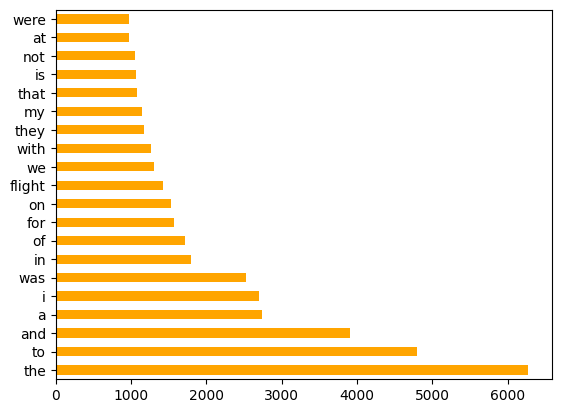

In [21]:
sample = df.sample(1000, random_state=42)
all_words = sample.Review.str.lower().str.split().sum()

pd.Series(all_words).value_counts().head(20).plot.barh(color='orange');

Uhoh! Not what we wanted ... what appears are mostly **stopwords** ... That is, we find on top terms that do not convey information, which is typical. Lists of stopwords for many languages can be found in online sources.

In [22]:
#! pip3 install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/enric/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
len(stop)

198

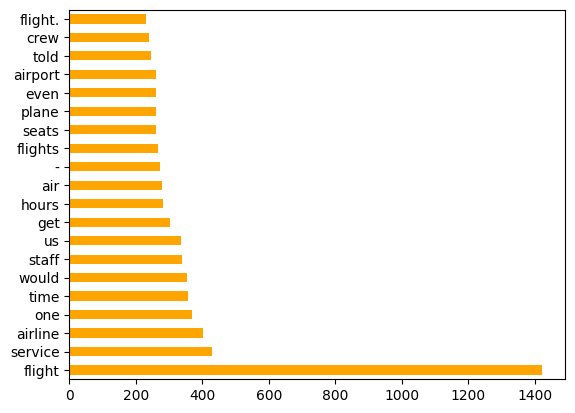

In [25]:
sample = df.sample(1000, random_state=42)
all_words = sample.Review.str.lower().str.split().sum()

# New
filtered_words = [w for w in all_words if w not in stop]
pd.Series(filtered_words).value_counts().head(20).plot.barh(color='orange');

Let's try to plot this as a wordcloud. The beauty and power of python is that - regardless of your objective - you can always find some package that will get close to what you want:

<center>
    <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/xkcdimport.png' width='50%'>
</center>

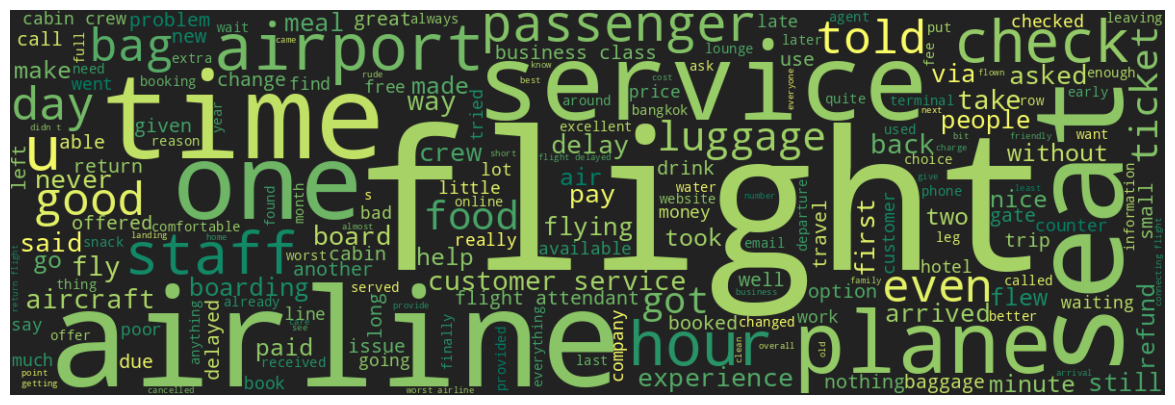

In [26]:
#! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(filtered_words)
wordcloud = WordCloud(width=1200, height=400, background_color='#222222', colormap='summer').generate(text)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The top-term seems to be flight. How often do the reviews include it?